# Linear Models (Continued) <a href="https://colab.research.google.com/github/burakai/ENGR4450/blob/main/4_support-vector-machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### *Example 1: (Example 6 from previous notebook) Bad Fit*

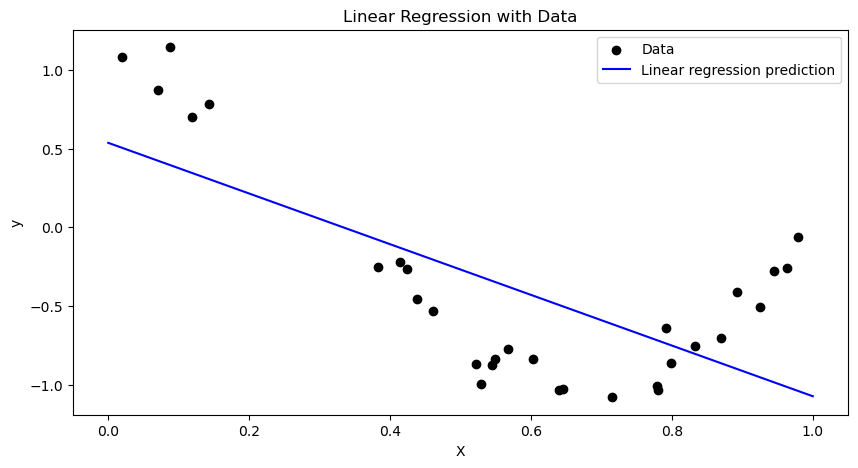

R2 Score: 0.4736796287494851


In [8]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression

# Generate some data
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

model = LinearRegression()
    
model.fit(X[:, np.newaxis], y)

# Plot the data
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='black', label="Data")  # Data points

# Plot the model's prediction
X_plot = np.linspace(0, 1, 100)
predictions = model.predict(X_plot[:, np.newaxis])
plt.plot(X_plot, predictions, color='blue', label="Linear regression prediction")  # Prediction

# Add labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Data')
plt.legend()

# Display the plot
plt.show()

# Evaluate the model using cross-validation
score = model.score(X[:, np.newaxis], y)
print("R2 Score:", score)

### *Example 2: Extending Linear Regression with Polynomial Features*

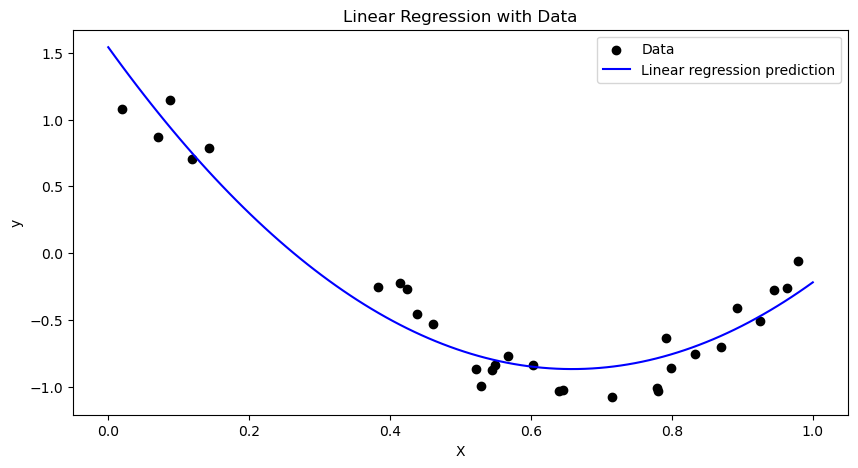

R2 Score: 0.93080078598832


In [7]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Generate some data
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
linear_regression = LinearRegression()
    
pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ]
)
    
    
pipeline.fit(X[:, np.newaxis], y)

# Plot the data
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='black', label="Data")  # Data points

# Plot the model's prediction
X_plot = np.linspace(0, 1, 100)
predictions = pipeline.predict(X_plot[:, np.newaxis])
plt.plot(X_plot, predictions, color='blue', label="Linear regression prediction")  # Prediction

# Add labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Data')
plt.legend()

# Display the plot
plt.show()

# Evaluate the model using cross-validation
score = pipeline.score(X[:, np.newaxis], y)
print("R2 Score:", score)

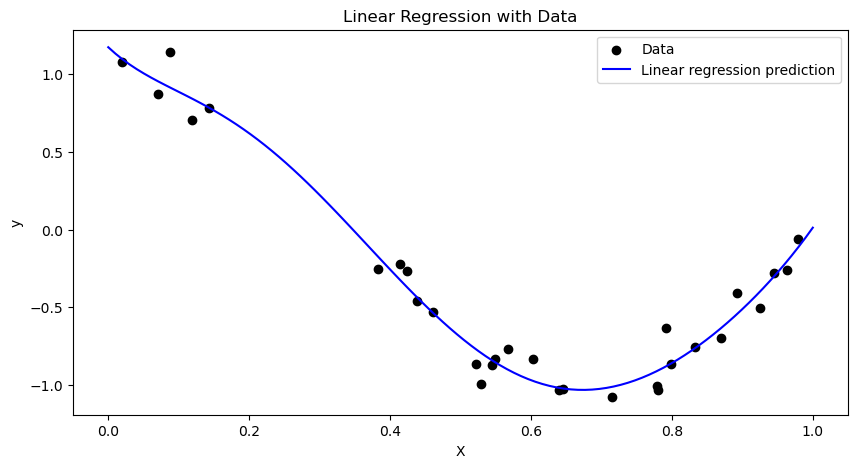

R2 Score: 0.9747297712132054


In [9]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Generate some data
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

polynomial_features = PolynomialFeatures(degree=6, include_bias=False)
linear_regression = LinearRegression()
    
pipeline = Pipeline(
    [
        ("polynomial_features", polynomial_features),
        ("linear_regression", linear_regression),
    ]
)
    
    
pipeline.fit(X[:, np.newaxis], y)

# Plot the data
plt.figure(figsize=(10, 5))
plt.scatter(X, y, color='black', label="Data")  # Data points

# Plot the model's prediction
X_plot = np.linspace(0, 1, 100)
predictions = pipeline.predict(X_plot[:, np.newaxis])
plt.plot(X_plot, predictions, color='blue', label="Linear regression prediction")  # Prediction

# Add labels and legend
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression with Data')
plt.legend()

# Display the plot
plt.show()

# Evaluate the model using cross-validation
score = pipeline.score(X[:, np.newaxis], y)
print("R2 Score:", score)

- While the model makes some accurate predictions near the center where the data is less curved, it performs poorly at the extremes.
- This kind of model may work well for some linear relationships, but for complex patterns, a more flexible model (like polynomial regression) might be better.


## Introducing `Pipeline` in `Scikit-learn`

**What is a Pipeline?**

In machine learning, a pipeline helps streamline the process of transforming data and training models by combining multiple steps into a single object.

A pipeline ensures that these steps are executed in the correct order and can be treated as a single unit, which is especially useful for cross-validation and grid search.

**A typical pipeline includes:**

- Data preprocessing steps (e.g., scaling, encoding, feature extraction)
- Model training (e.g., linear regression, decision trees)

**Key Advantages of Using Pipelines:**

- Simplifies Workflow: A pipeline combines various steps (data transformation, model training) into a single object. This makes it easier to handle complex workflows.
- Prevents Data Leakage: By ensuring that data transformations are applied only to training data during cross-validation, pipelines help avoid data leakage, which can lead to overly optimistic performance estimates.
- Hyperparameter Tuning: Pipelines make it easier to search over a range of hyperparameters, including those related to preprocessing and model training, using tools like GridSearchCV or RandomizedSearchCV.

A scikit-learn pipeline is constructed as a sequence of steps.

Each step except the last must be a transformer (i.e., an object that implements the fit and transform methods), and the last step must be an estimator (i.e., an object that implements the fit and predict methods).

### Pipeline Examples
#### Simple Pipeline


In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

steps = [
    ("preprocessing", StandardScaler()),
    ("classifier", LinearRegression()),
]
pipe = Pipeline(steps)
pipe

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier', LinearRegression())])

#### Setting Config for Displaying Pipelines

In [2]:
from sklearn import set_config

set_config(display="text")
pipe  # click on the diagram below to see the details of each step

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier', LinearRegression())])

#### Adding An Element to Pipeline

In [3]:
from sklearn import set_config
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

set_config(display="diagram")

steps = [
    ("standard_scaler", StandardScaler()),
    ("polynomial", PolynomialFeatures(degree=3)),
    ("classifier", LinearRegression()),
]
    
pipe = Pipeline(steps)
pipe  # click on the diagram below to see the details of each step

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('polynomial', PolynomialFeatures(degree=3)),
                ('classifier', LinearRegression())])

The `make_pipeline` function in scikit-learn is a shorthand for creating a pipeline without needing to name each step explicitly, automatically assigning names based on the estimators provided, making the code more concise.

In [4]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

pipeline = make_pipeline(StandardScaler(), LinearRegression())
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

#### You Can Create More Complex Pipelines

In [5]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

numeric_preprocessor = Pipeline(
    steps=[
        ("imputation_mean", SimpleImputer(missing_values=np.nan, strategy="mean")),
        ("scaler", StandardScaler()),
    ]
)

categorical_preprocessor = Pipeline(
    steps=[
        (
            "imputation_constant",
            SimpleImputer(fill_value="missing", strategy="constant"),
        ),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

preprocessor = ColumnTransformer(
    [
        ("categorical", categorical_preprocessor, ["state", "gender"]),
        ("numerical", numeric_preprocessor, ["age", "weight"]),
    ]
)

pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
pipe  # click on the diagram below to see the details of each step

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical',
                                                  Pipeline(steps=[('imputation_constant',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['state', 'gender']),
                                                 ('numerical',
                                                  Pipeline(steps=[('imputation_mean',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'weight'])])),
                ('logisticregression', LogisticRegression(max_iter=500))])

---

# Underfitting vs. Overfitting

In [74]:
import matplotlib.pyplot as plt
import numpy as np

from IPython.display import display
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

In [75]:
def create_polynomial_regression(degrees):
    polynomial_features = PolynomialFeatures(degree=degrees, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    return pipeline

In [76]:
for i in range(len(degrees)):
    pipeline = create_polynomial_regression(degrees[i])
    display(pipeline)

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=1, include_bias=False)),
                ('linear_regression', LinearRegression())])

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=4, include_bias=False)),
                ('linear_regression', LinearRegression())])

Pipeline(steps=[('polynomial_features',
                 PolynomialFeatures(degree=15, include_bias=False)),
                ('linear_regression', LinearRegression())])

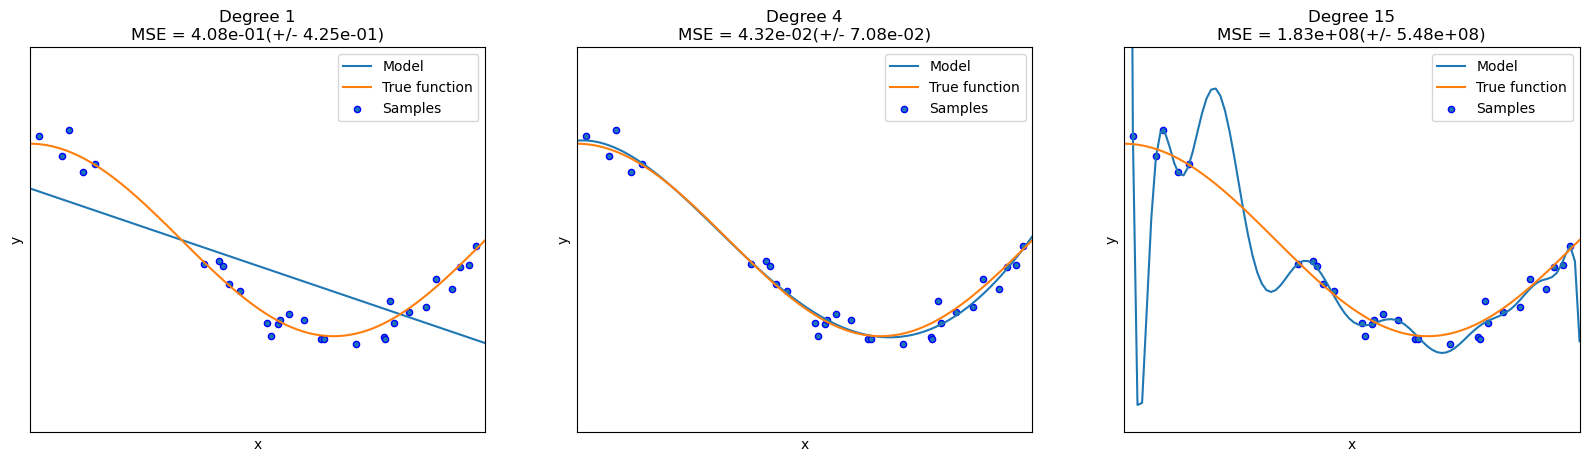

In [77]:
plt.figure(figsize=(20, 5))

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    pipeline = create_polynomial_regression(degrees[i])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

## Ridge Regression and Classification
### Ridge Regression

[`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge "sklearn.linear_model.Ridge") regression addresses some of the problems of [Ordinary Least Squares](https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) by imposing a penalty on the size of the coefficients. The ridge coefficients minimize a penalized residual sum of squares:

The complexity parameter controls the amount of shrinkage: the larger the value of $ ff $, the greater the amount of shrinkage and thus the coefficients become more robust to collinearity.

[![../_images/sphx_glr_plot_ridge_path_001.png](https://scikit-learn.org/stable/_images/sphx_glr_plot_ridge_path_001.png)](https://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html)

As with other linear models, [`Ridge`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge "sklearn.linear_model.Ridge") will take in its `fit` method arrays `X`, `y` and will store the coefficients of the linear model in its `coef_` member:

Some of these regressors are also used as classifiers, showcasing their versatility in machine learning tasks.

For example, models like `LogisticRegression` and `RidgeClassifier` can be employed to categorize data points, while techniques such as `SGDClassifier` cover a range of linear classification algorithms, including support vector machines and logistic regression. This dual functionality highlights the adaptability of these algorithms across different problem domains, making them valuable tools for both regression and classification challenges.

In our upcoming Neural Networks notebook, we will also explore the Perceptron model. As a fundamental component of neural networks, the Perceptron exemplifies essential concepts like decision boundaries and linear separability. 

This discussion will enhance your understanding of how simple linear classifiers can evolve into more complex models, laying the groundwork for advanced machine learning techniques.

### Linear Classifiers

| Classifier | Description |
|------------|-------------|
| [`LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) | Logistic Regression (aka logit, MaxEnt) classifier. |
| [`LogisticRegressionCV`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html) | Logistic Regression CV (aka logit, MaxEnt) classifier. |
| [`PassiveAggressiveClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.PassiveAggressiveClassifier.html) | Passive Aggressive Classifier. |
| [`Perceptron`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) | Linear perceptron classifier. |
| [`RidgeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html) | Classifier using Ridge regression. |
| [`RidgeClassifierCV`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifierCV.html) | Ridge classifier with built-in cross-validation. |
| [`SGDClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) | Linear classifiers (SVM, logistic regression, etc.) with SGD training. |
| [`SGDOneClassSVM`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDOneClassSVM.html) | Solves linear One-Class SVM using Stochastic Gradient Descent. |

### Cross Validation Score

Cross-validation score is a metric used to evaluate a machine learning model’s performance by splitting the data into several folds.

The model is trained on multiple subsets of the data and tested on the remaining one, repeating this process across all folds.

This approach helps ensure the model’s ability to generalize to new data, providing a more reliable and stable estimate of performance compared to a single train-test split.


- Using cross-validation (cross_val_score) instead R2 score for the following model is optional but highly recommended, especially when you want to evaluate how well the model generalizes to unseen data.

**Why Use Cross-Validation?**

- **Avoid Overfitting:** In cases where the model may fit the training data too well, cross-validation helps you check if the model’s performance is consistent across different subsets of the data. This prevents the model from overfitting to a particular training set.
- **Evaluate Model Stability:** Cross-validation provides a more reliable measure of model performance by testing it on multiple folds of data (e.g., k-fold cross-validation). Instead of training and testing on a single split, cross-validation tests on several different splits, giving a better estimate of how well the model performs on unseen data.
- **Small Dataset:** With only 30 data points, a train-test split may result in high variability. Cross-validation allows you to use the entire dataset more efficiently by repeatedly training and testing the model on different subsets.

**When Not to Use Cross-Validation**

- **Simple Models with Sufficient Data:** If you have a large dataset and are just performing basic linear regression, cross-validation may not be strictly necessary, and a simple train-test split could suffice.
- **Computational Efficiency:** Cross-validation is more computationally expensive, so if computational resources or time is a concern, using a single train-test split might be a better choice.

For a small dataset like yours with only 30 samples, using cross-validation is a good idea because it will provide a better understanding of the model’s generalization performance. The mean squared error (MSE) from cross-validation will give you a more stable evaluation of how the model is likely to perform on new data.

## Bayesian Regression

## Logistic Regression

## SGDClassifier


### 